<a href="https://colab.research.google.com/github/mnrazamohamed/Time_Series/blob/main/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction**

### **Problem Statement**
Heart rate is a critical physiological metric that helps in monitoring an individual's overall health. Sudden variations in heart rate can indicate severe medical conditions, including strokes, heart failure, and sudden cardiac arrest. By predicting future heart rate values, healthcare professionals can detect irregularities early and take preventive actions.

With advancements in artificial intelligence and real-time stream processing, machine learning models can now provide accurate time series predictions. In this project, we leverage time series modeling techniques to forecast heart rate values, which can aid in early detection and timely medical intervention.

### **Objective**
The primary objective of this project is to develop an effective time series model to predict the next twenty (20) observations (minutes) of **Lifetouch Heart Rate**. The predictions should be as accurate as possible to support early diagnosis and potential healthcare applications.

### **Dataset Overview**
The dataset consists of six CSV files, where:
- Five files (**PiD...csv**) serve as additional time series data for model experimentation.
- One file (**PT_Train.csv**) contains the main training data used for final model predictions.

Each dataset contains heart rate values recorded at different timestamps. The preprocessing steps will focus on ensuring data consistency, handling missing values, and addressing potential anomalies before model training and forecasting.

This report outlines the data preprocessing, exploratory analysis, model selection, training process, and final predictions for submission. We will justify all preprocessing and modeling choices to ensure the robustness of the forecasting approach.



In [ ]:
# Mount Google Drive to access stored files
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


This cell defines file paths for the training and testing datasets stored in Google Drive. Each training file represents a different session of heart rate measurements.

In [ ]:
# Define file paths for training and test datasets stored in Google Drive

train_path_p1 = '/content/drive/MyDrive/BCU - MSc in AI/Time Series/PiDL1404505__Session_ID_1434__From_02_02_2016_15_39_11_to_05_02_2016_13_15_46__Exported_21_07_32.csv'
train_path_p2 = '/content/drive/MyDrive/BCU - MSc in AI/Time Series/PiDL1405567__Session_ID_1505__From_24_02_2016_15_53_48_to_29_02_2016_09_57_31__Exported_09_22_35.csv'
train_path_p3 = '/content/drive/MyDrive/BCU - MSc in AI/Time Series/PiDL1407706__Session_ID_1592__From_12_03_2016_11_37_59_to_15_03_2016_09_19_59__Exported_09_39_32.csv'
train_path_p4 = '/content/drive/MyDrive/BCU - MSc in AI/Time Series/PiDL1408188__Session_ID_1568__From_07_03_2016_12_12_08_to_08_03_2016_08_50_22__Exported_09_35_31.csv'
train_path_p5 = '/content/drive/MyDrive/BCU - MSc in AI/Time Series/PiDL1409031__Session_ID_1579__From_10_03_2016_12_41_23_to_11_03_2016_11_15_49__Exported_09_37_43.csv'

# Define file path for the test dataset (final dataset used for prediction)
test_path     = '/content/drive/MyDrive/BCU - MSc in AI/Time Series/PT_Train.csv'

This cell loads the training and test datasets into pandas DataFrames for further processing.


In [ ]:
# Import the pandas library for data manipulation
import pandas as pd

# Load the training datasets from CSV files into DataFrames
train_df_p1 = pd.read_csv(train_path_p1)  # Patient session 1
train_df_p2 = pd.read_csv(train_path_p2)  # Patient session 2
train_df_p3 = pd.read_csv(train_path_p3)  # Patient session 3
train_df_p4 = pd.read_csv(train_path_p4)  # Patient session 4
train_df_p5 = pd.read_csv(train_path_p5)  # Patient session 5

# Load the test dataset (used for final prediction)
test_df = pd.read_csv(test_path)


This cell stores all training datasets in a list for easier iteration and processing.


In [ ]:
# Create a list of training DataFrames for easy iteration and manipulation
df_list = [train_df_p1, train_df_p2, train_df_p3, train_df_p4, train_df_p5]


# Data Preprocessing



##  Feature Selection

This cell ensures that only the required columns (Timestamp (GMT) and Lifetouch Heart Rate) are retained in each DataFrame, removing any irrelevant columns.


In [ ]:
# Keep only 'Timestamp (GMT)' and 'Lifetouch Heart Rate' columns, drop others
for df in df_list:
    df.drop(columns=[col for col in df.columns if col not in ['Timestamp (GMT)', 'Lifetouch Heart Rate']], inplace=True)
# Keep only 'Timestamp (GMT)' and 'Lifetouch Heart Rate' in the test dataset
test_df.drop(columns=[col for col in test_df.columns if col not in ['Timestamp (GMT)', 'Lifetouch Heart Rate']], inplace=True)

## Time Index Handling

This cell converts the 'Timestamp (GMT)' column into a DateTime format and sets it as the index for both training and test datasets.

In [ ]:
# Convert 'Timestamp (GMT)' to DateTime format and set it as the index for all training datasets
for i, dfs in enumerate(df_list):
    dfs['Timestamp (GMT)'] = pd.to_datetime(dfs['Timestamp (GMT)'], dayfirst=True)  # Ensure correct date format
    dfs.set_index('Timestamp (GMT)', inplace=True)  # Set timestamp as index

# Apply the same transformation to the test dataset
test_df['Timestamp (GMT)'] = pd.to_datetime(test_df['Timestamp (GMT)'], dayfirst=True)
test_df.set_index('Timestamp (GMT)', inplace=True)


## Time Interval Analysis

This cell calculates the time differences between consecutive timestamps and prints their frequency distribution for each dataset. This helps analyze the consistency of time intervals in the time series data.

In [ ]:
# Analyze time interval consistency in each dataset
for df in df_list:
    print(df.index.to_series().diff().value_counts())  # Print frequency of time gaps


Timestamp (GMT)
0 days 00:01:00    4176
Name: count, dtype: int64
Timestamp (GMT)
0 days 00:01:00    6843
Name: count, dtype: int64
Timestamp (GMT)
0 days 00:01:00    4181
Name: count, dtype: int64
Timestamp (GMT)
0 days 00:01:00    1238
Name: count, dtype: int64
Timestamp (GMT)
0 days 00:01:00    1354
Name: count, dtype: int64


## Missing Values Analysis

This cell checks for missing values in each training dataset and prints the count of missing values for each column.

In [ ]:
# Check for missing values in each training dataset
for i, df in enumerate(df_list, 1):
    print(f"Missing values in train_df_p{i}:")
    print(df.isna().sum())  # Count missing values in each column
    print("\n")

Missing values in train_df_p1:
Lifetouch Heart Rate    69
dtype: int64


Missing values in train_df_p2:
Lifetouch Heart Rate    2456
dtype: int64


Missing values in train_df_p3:
Lifetouch Heart Rate    2
dtype: int64


Missing values in train_df_p4:
Lifetouch Heart Rate    787
dtype: int64


Missing values in train_df_p5:
Lifetouch Heart Rate    1
dtype: int64




## Handling Missing Values

This cell ensures that completely missing rows (NaN) at the first and last timestamp of each dataset are removed, preventing errors during modeling.

In [ ]:
# Combine all training datasets with the test dataset into a single list
temp_dfs = [df_list + [test_df]]
temp_dfs = [i for d in temp_dfs for i in d]  # Flatten the nested list

for df in temp_dfs:
    # Identify the earliest and latest timestamps
    min_timestamp = df.index.min()
    max_timestamp = df.index.max()

    # Identify rows where all values in 'Lifetouch Heart Rate' are NaN
    mask_all_nan = df[['Lifetouch Heart Rate']].isna().all(axis=1)

    # Remove only fully missing rows that occur at the first or last timestamp
    mask_remove = mask_all_nan & df.index.isin([min_timestamp, max_timestamp])
    df.drop(df[mask_remove].index, inplace=True)

 # Exploratory Data Analysis (EDA)

## Time Series Visualization

This cell plots the heart rate time series for each dataset, helping in understanding data patterns, trends, and potential anomalies.

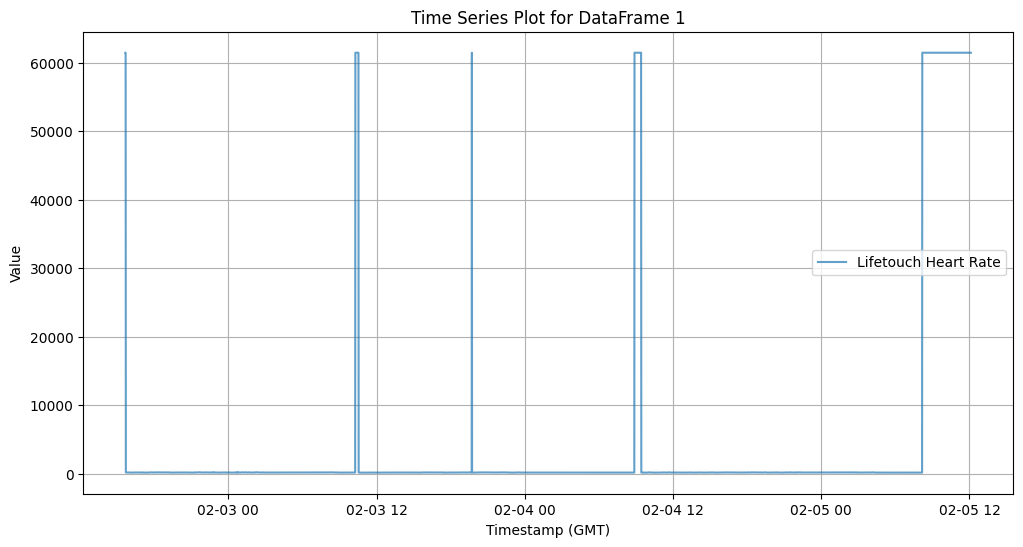

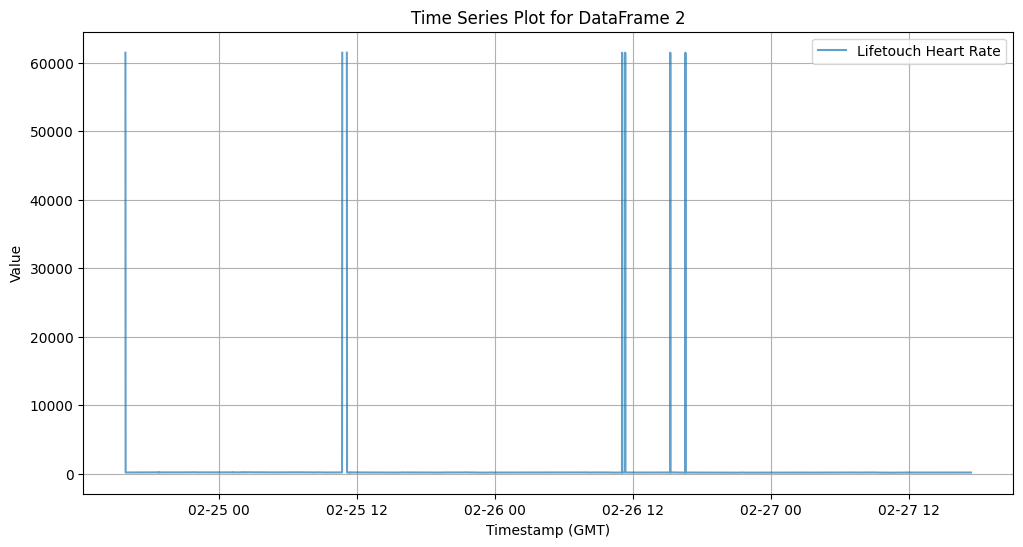

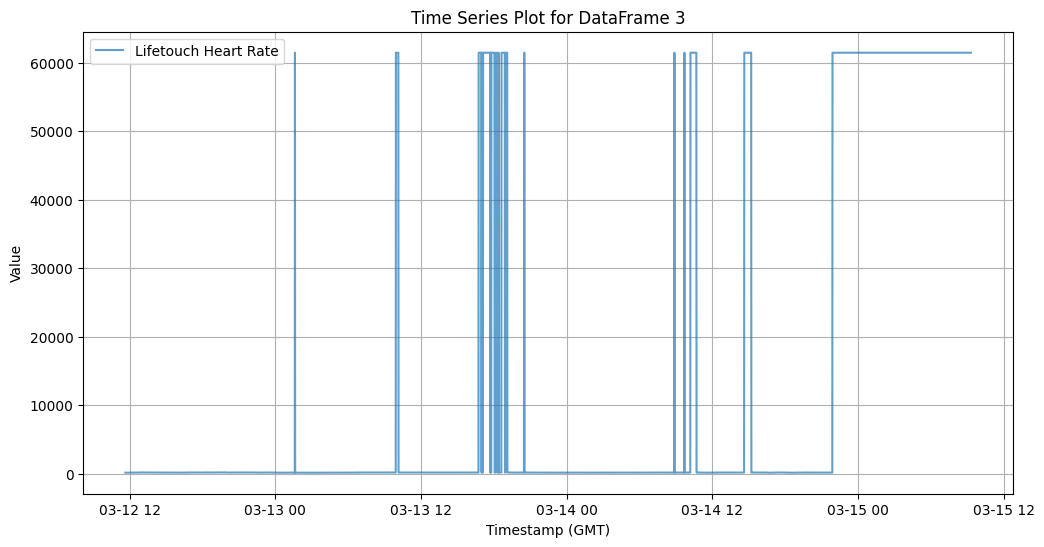

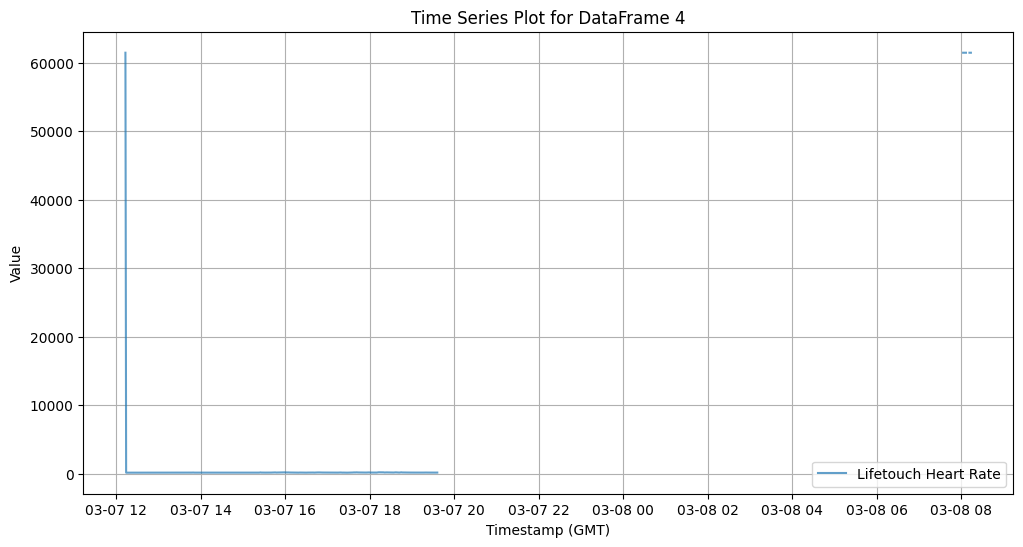

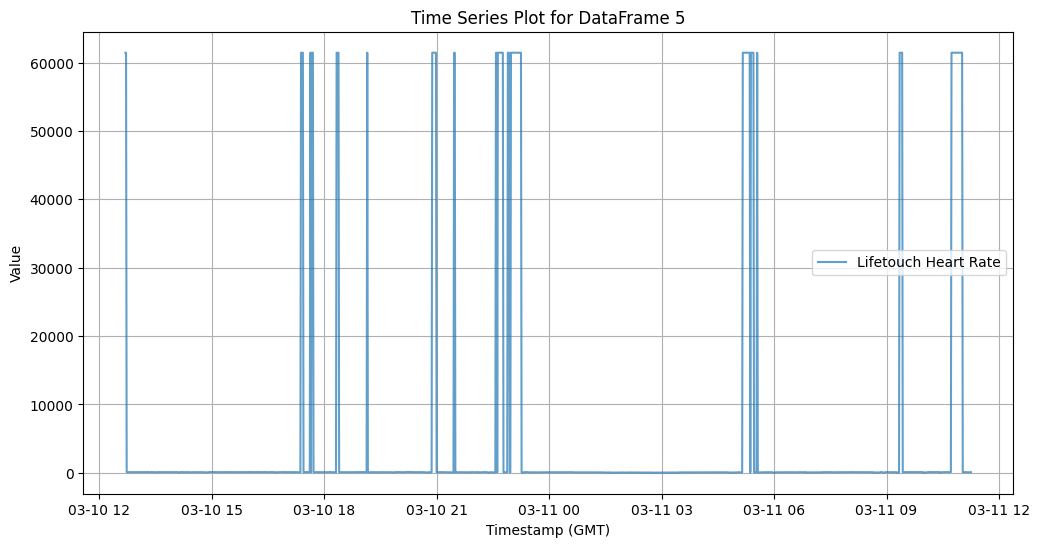

In [ ]:
import matplotlib.pyplot as plt

# Plot the heart rate time series for each dataset
for i, df in enumerate(df_list):
    plt.figure(figsize=(12, 6))  # Set figure size
    plt.title(f'Time Series Plot for DataFrame {i+1}')  # Set title with dataset index
    plt.plot(df.index, df['Lifetouch Heart Rate'], label='Lifetouch Heart Rate', alpha=0.7)  # Plot heart rate
    plt.xlabel('Timestamp (GMT)')  # X-axis label
    plt.ylabel('Value')  # Y-axis label
    plt.legend()  # Show legend for clarity
    plt.grid(True)  # Add grid to enhance readability
    plt.show()  # Display the plot


## Autocorrelation Analysis

This cell generates autocorrelation function (ACF) plots to identify time dependencies in heart rate data. High autocorrelation at specific lags suggests periodic patterns or trends.


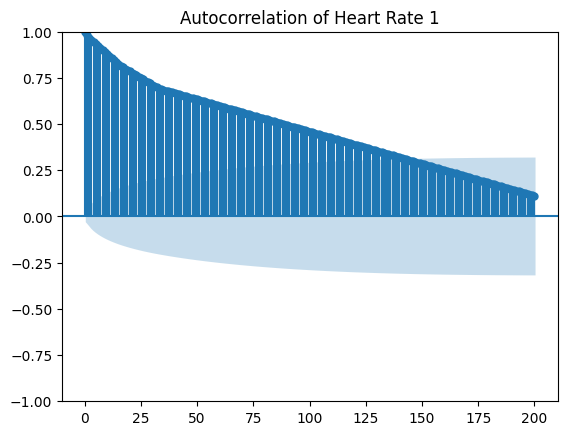

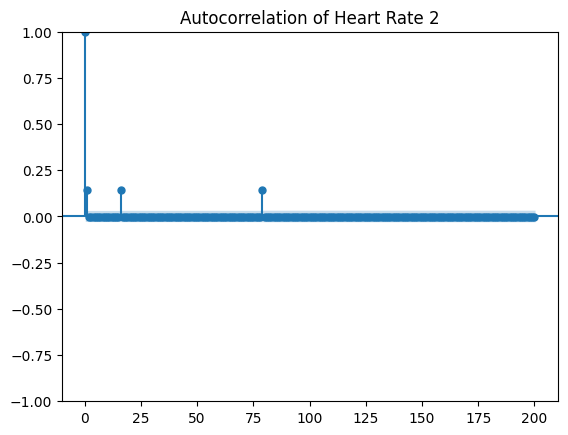

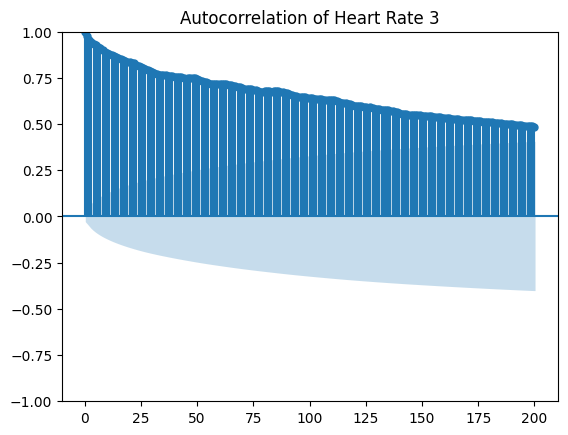

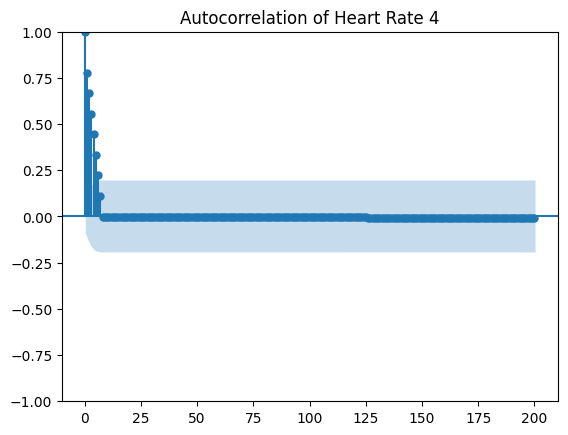

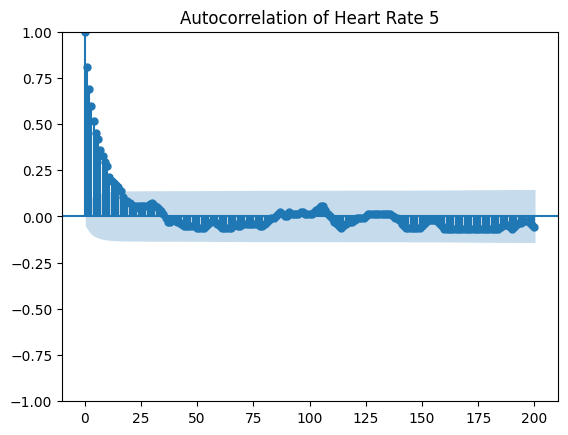

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Generate Autocorrelation Function (ACF) plots for each dataset
for i, df in enumerate(df_list):
    # Drop NaNs to avoid errors in ACF computation
    series = df['Lifetouch Heart Rate'].dropna()

    # Plot the autocorrelation function with 200 lags
    max_lags = min(200, len(series) // 2)  # Set lags dynamically
    plot_acf(series, lags=max_lags)

    plt.title(f"Autocorrelation of Heart Rate {i+1}")  # Title with dataset index
    plt.show()  # Display the plot


## Statistical Summary

This cell prints a statistical summary of the Lifetouch Heart Rate data for each dataset, including metrics like mean, min, max, and standard deviation.

In [ ]:
# Display summary statistics for 'Lifetouch Heart Rate' in each dataset
for i, df in enumerate(df_list, 1):
    print(f"DataFrame {i}")  # Identify the dataset
    print(df['Lifetouch Heart Rate'].describe())  # Display statistical summary
    print()  # Print an empty line for better readability


DataFrame 1
count     4108.000000
mean      4453.491237
std      15678.585420
min        114.000000
25%        134.000000
50%        139.000000
75%        151.000000
max      61442.000000
Name: Lifetouch Heart Rate, dtype: float64

DataFrame 2
count     4388.000000
mean       246.462170
std       2446.455527
min        118.000000
25%        138.000000
50%        146.000000
75%        160.000000
max      61442.000000
Name: Lifetouch Heart Rate, dtype: float64

DataFrame 3
count     4180.000000
mean     12992.642105
std      24949.592926
min        126.000000
25%        142.000000
50%        152.000000
75%        161.000000
max      61442.000000
Name: Lifetouch Heart Rate, dtype: float64

DataFrame 4
count      452.000000
mean      1361.491150
std       8572.902972
min        120.000000
25%        133.000000
50%        139.000000
75%        145.000000
max      61442.000000
Name: Lifetouch Heart Rate, dtype: float64

DataFrame 5
count     1354.000000
mean      4437.975628
std      15752.7


# Data Preprocessing

## Outlier Detection

This cell detects outliers in the heart rate data by counting the number of values greater than 250 BPM, which may be unrealistic or erroneous.

In [ ]:
# Identify and count heart rate values greater than 250 BPM (potential outliers)
for i, df in enumerate(df_list, 1):
    total_rows = len(df)  # Total number of records
    outliers_over_250 = (df['Lifetouch Heart Rate'] > 250).sum()  # Count values > 250
    rows_remaining = total_rows - outliers_over_250  # Remaining rows after removing outliers

    # Print outlier statistics
    print(f"DataFrame {i}:")
    print(f"  Total rows           : {total_rows}")
    print(f"  Rows with HR > 250   : {outliers_over_250}")
    print(f"  Rows remaining       : {rows_remaining}")
    print("-" * 40)  # Separator for readability


DataFrame 1:
  Total rows           : 4175
  Rows with HR > 250   : 289
  Rows remaining       : 3886
----------------------------------------
DataFrame 2:
  Total rows           : 6842
  Rows with HR > 250   : 7
  Rows remaining       : 6835
----------------------------------------
DataFrame 3:
  Total rows           : 4181
  Rows with HR > 250   : 876
  Rows remaining       : 3305
----------------------------------------
DataFrame 4:
  Total rows           : 1237
  Rows with HR > 250   : 9
  Rows remaining       : 1228
----------------------------------------
DataFrame 5:
  Total rows           : 1354
  Rows with HR > 250   : 96
  Rows remaining       : 1258
----------------------------------------


##  Outlier Handling

This cell applies capping to the Lifetouch Heart Rate column, setting a maximum value of 220 BPM to prevent unrealistic spikes.

In [ ]:
cap_value = 220  # Define the maximum allowed heart rate value

# Apply capping to limit extreme heart rate values
for i, df in enumerate(df_list, 1):
    df['Lifetouch Heart Rate'] = df['Lifetouch Heart Rate'].clip(upper=cap_value)  # Cap values above 220 BPM
    print(f"DataFrame {i} after capping:")
    print(df['Lifetouch Heart Rate'].describe(), "\n")  # Print summary statistics after capping


DataFrame 1 after capping:
count    4108.000000
mean      146.559640
std        22.536664
min       114.000000
25%       134.000000
50%       139.000000
75%       151.000000
max       220.000000
Name: Lifetouch Heart Rate, dtype: float64 

DataFrame 2 after capping:
count    4388.000000
mean      148.797630
std        14.854006
min       118.000000
25%       138.000000
50%       146.000000
75%       160.000000
max       220.000000
Name: Lifetouch Heart Rate, dtype: float64 

DataFrame 3 after capping:
count    4180.000000
mean      162.586124
std        30.731483
min       126.000000
25%       142.000000
50%       152.000000
75%       161.000000
max       220.000000
Name: Lifetouch Heart Rate, dtype: float64 

DataFrame 4 after capping:
count    452.000000
mean     142.486726
std       15.984813
min      120.000000
25%      133.000000
50%      139.000000
75%      145.000000
max      220.000000
Name: Lifetouch Heart Rate, dtype: float64 

DataFrame 5 after capping:
count    1354.000000


# Exploratory Data Analysis (EDA)

## Post-Processing Time Series Visualization

This cell plots the preprocessed heart rate time series for each dataset, helping verify if data cleaning steps (such as outlier removal and capping) have preserved meaningful trends.

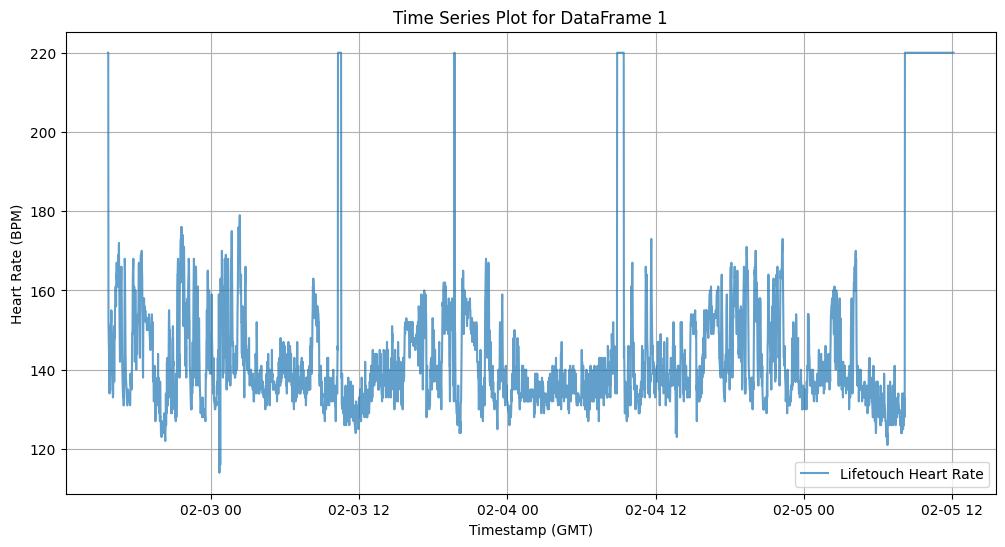

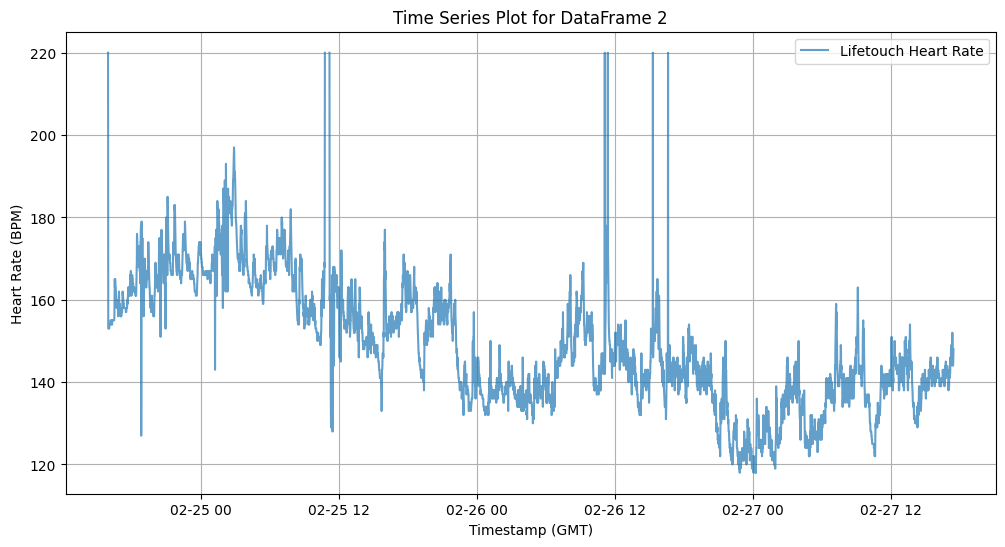

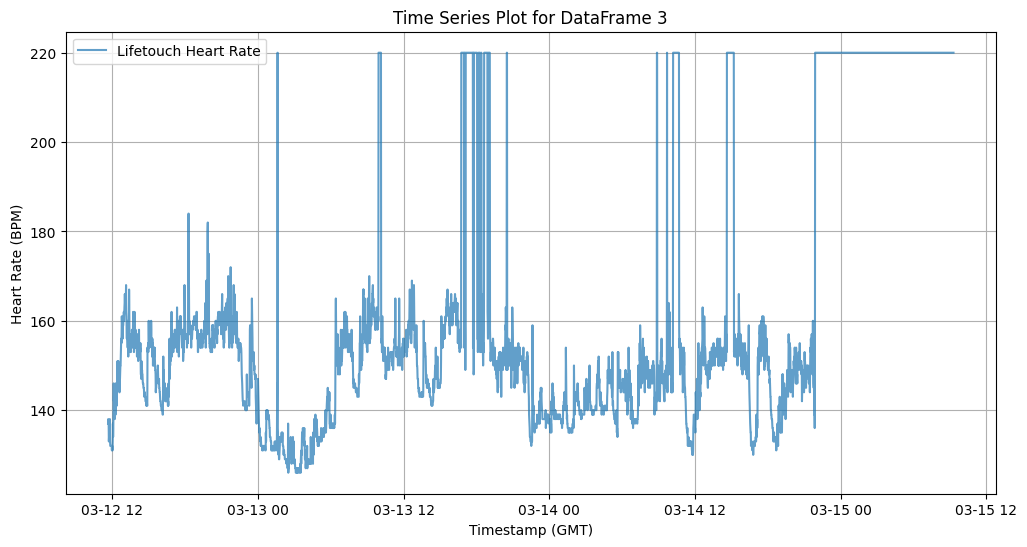

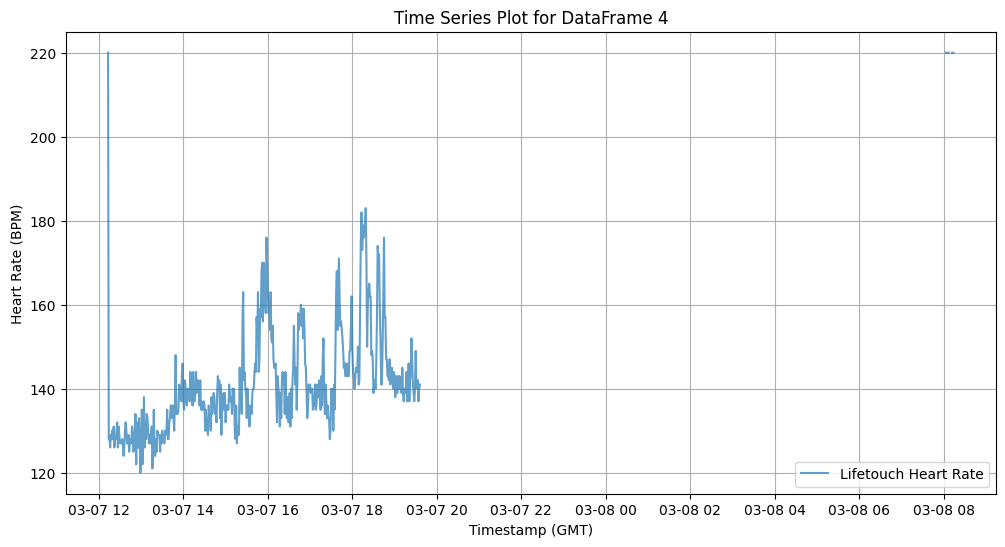

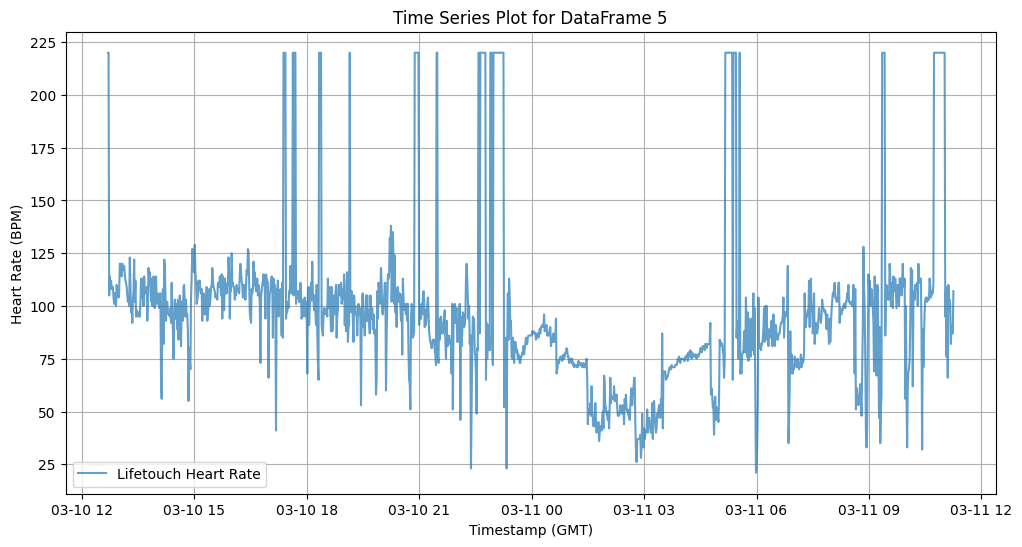

In [ ]:
import matplotlib.pyplot as plt

# Plot the heart rate time series after preprocessing
for i, df in enumerate(df_list):
    plt.figure(figsize=(12, 6))  # Set figure size for clarity
    plt.title(f'Time Series Plot for DataFrame {i+1}')  # Title with dataset index
    plt.plot(df.index, df['Lifetouch Heart Rate'], label='Lifetouch Heart Rate', alpha=0.7)  # Plot heart rate
    plt.xlabel('Timestamp (GMT)')  # X-axis label
    plt.ylabel('Heart Rate (BPM)')  # Y-axis label
    plt.legend()  # Show legend
    plt.grid(True)  # Add grid for better readability
    plt.show()  # Display the plot


## Post-Processing Autocorrelation Analysis

This cell generates autocorrelation function (ACF) plots for each dataset to analyze how past heart rate values influence future values over different time lags.

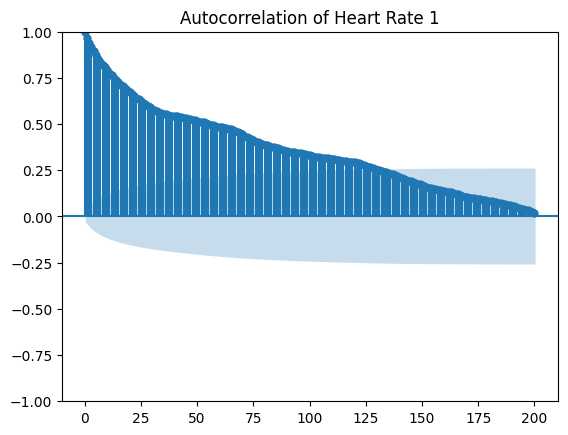

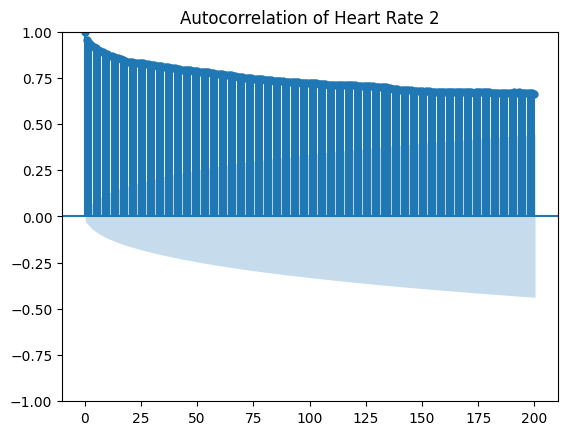

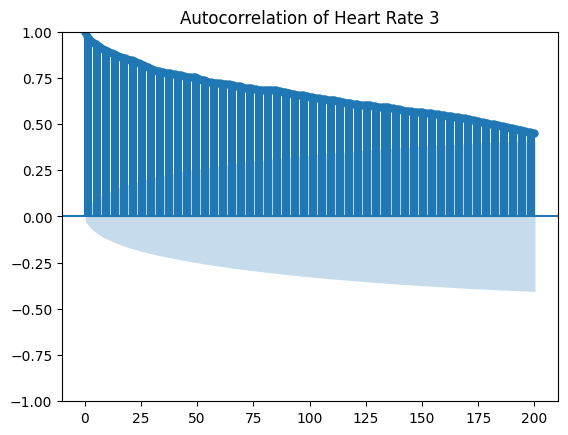

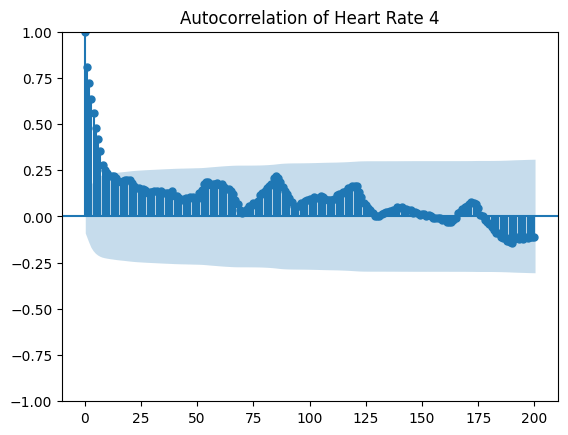

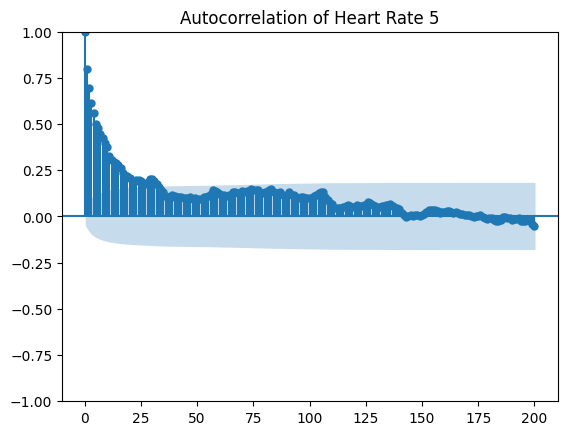

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Generate ACF plots for each dataset after preprocessing
for i, df in enumerate(df_list):
    # Drop NaNs to avoid errors in ACF computation
    series = df['Lifetouch Heart Rate'].dropna()

    # Plot the autocorrelation function with 200 lags
    plot_acf(series, lags=200)
    plt.title(f"Autocorrelation of Heart Rate {i+1}")  # Title with dataset index
    plt.show()  # Display the plot


#  Data Preprocessing

## Time Series Alignment & Interpolation

This cell standardizes timestamps across all datasets by creating a consistent time index and interpolating missing values for smooth analysis.


In [ ]:
import pandas as pd

# Step 1: Find the earliest start time and latest end time
start_time = min(df.index.min() for df in df_list)  # Earliest timestamp across all datasets
end_time = max(df.index.max() for df in df_list)    # Latest timestamp

# Step 2: Determine the smallest time interval across all DataFrames
min_time_diff = min(
    (df.index[1:] - df.index[:-1]).min() for df in df_list if len(df) > 1  # Find the smallest time gap
)

# Step 3: Create a new extended time index covering the entire time range
extended_time_index = pd.date_range(start=start_time, end=end_time, freq=min_time_diff)

# Step 4: Reindex each DataFrame to match the extended time index (aligning timestamps)
reindexed_dfs = [df.reindex(extended_time_index) for df in df_list]

# Step 5: Combine all DataFrames by stacking them row-wise (appending)
combined_df = pd.concat(reindexed_dfs, axis=0).sort_index()

# Step 6: Interpolate missing values caused by reindexing
combined_df.interpolate(method='time', inplace=True)  # Time-based interpolation for smooth data


# Exploratory Data Analysis (EDA)

## Visualizing the Combined Time Series

This cell plots the final preprocessed time series after alignment and interpolation to confirm data consistency.

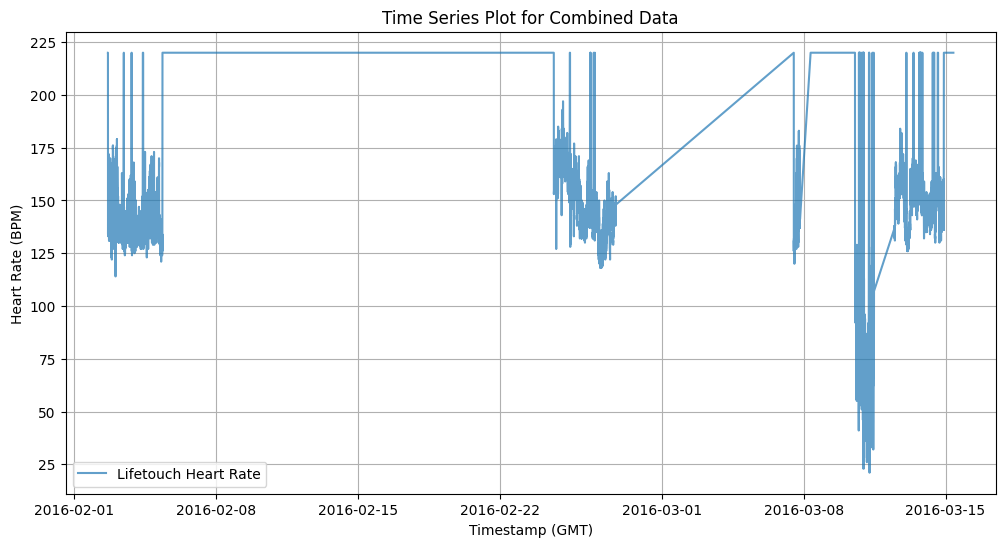

In [ ]:
plt.figure(figsize=(12, 6))  # Set figure size for better readability
plt.title('Time Series Plot for Combined Data')  # Set title
plt.plot(combined_df.index, combined_df['Lifetouch Heart Rate'], label='Lifetouch Heart Rate', alpha=0.7)  # Plot data
plt.xlabel('Timestamp (GMT)')  # X-axis label
plt.ylabel('Heart Rate (BPM)')  # Y-axis label
plt.legend()  # Show legend to identify the line
plt.grid(True)  # Add grid to improve readability
plt.show()  # Display the plot


 # Data Preprocessing

## Removing Consecutive Duplicates & Resetting Index

This cell removes consecutive duplicate heart rate values, resets the index to a sequential 1-minute interval, and renames the index for clarity.

In [ ]:
import pandas as pd

# Step 1: Remove consecutive duplicate heart rate values while keeping the first occurrence
df_filtered = df[df['Lifetouch Heart Rate'].ne(df['Lifetouch Heart Rate'].shift())]

# Step 2: Reset index and set a uniform time interval of 1 minute
df_filtered = df_filtered.reset_index(drop=True)  # Remove old index
df_filtered.index = pd.timedelta_range(start="0 days", periods=len(df_filtered), freq="1min")  # New time index

# Step 3: Rename the index to 'Time Frame' for better interpretability
df_filtered.index.name = 'Time Frame'


# Exploratory Data Analysis (EDA)

## Visualizing the Filtered Time Series

This cell plots the filtered time series to confirm that consecutive duplicate values were successfully removed and that the new time intervals are correctly applied.

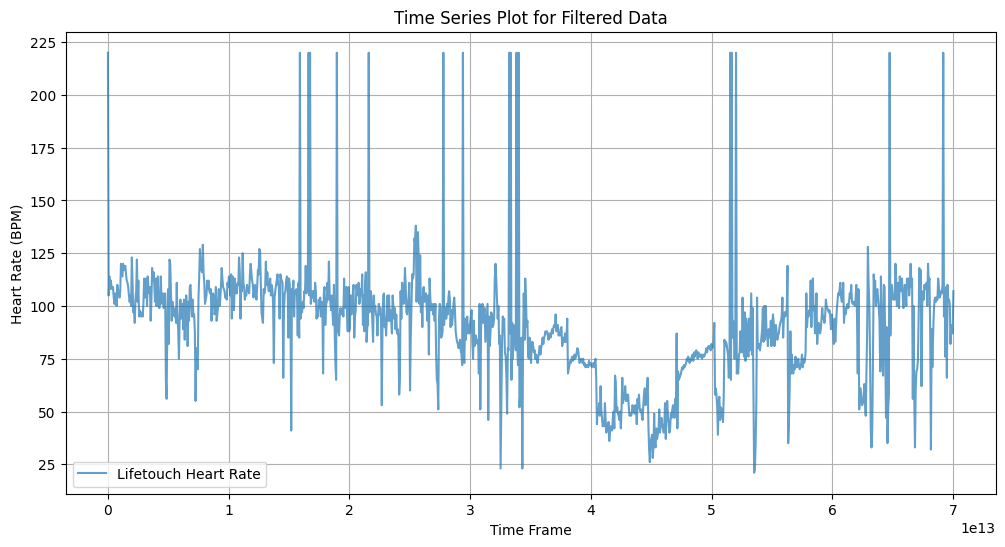

In [ ]:
plt.figure(figsize=(12, 6))  # Set figure size for better visualization
plt.title('Time Series Plot for Filtered Data')  # Set a descriptive title
plt.plot(df_filtered.index, df_filtered['Lifetouch Heart Rate'], label='Lifetouch Heart Rate', alpha=0.7)  # Plot heart rate
plt.xlabel('Time Frame')  # Update X-axis label to reflect sequential time intervals
plt.ylabel('Heart Rate (BPM)')  # Set Y-axis label
plt.legend()  # Show legend to identify the series
plt.grid(True)  # Add grid to improve readability
plt.show()  # Display the plot


# Modeling

This cell installs statsmodels and pmdarima, which are essential for time series analysis and forecasting.


In [ ]:
!pip install statsmodels pmdarima

This cell imports the necessary libraries for data manipulation, statistical analysis, and visualization for time series forecasting.

In [ ]:
import pandas as pd
import numpy as np
import pmdarima as pm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


## Log Transformation

This cell applies a natural logarithm transformation to the heart rate values to normalize the data and reduce variance.

In [ ]:
# Apply log transformation to stabilize variance
df_filtered['Lifetouch Heart Rate log'] = np.log(df_filtered['Lifetouch Heart Rate'])


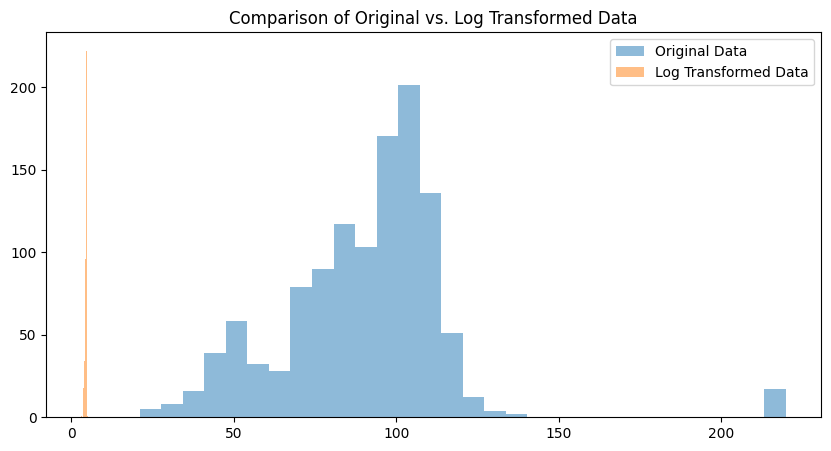

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(df_filtered['Lifetouch Heart Rate'], bins=30, alpha=0.5, label='Original Data')
plt.hist(df_filtered['Lifetouch Heart Rate log'].dropna(), bins=30, alpha=0.5, label='Log Transformed Data')
plt.legend()
plt.title('Comparison of Original vs. Log Transformed Data')
plt.show()


## Stationarity Check (ADF Test)

This cell defines a function to perform the Augmented Dickey-Fuller (ADF) Test, which tests for stationarity in the log-transformed heart rate data.

In [ ]:
# Function to perform the Augmented Dickey-Fuller (ADF) test for stationarity
def adf_check(series):
    result = adfuller(series, autolag='AIC')  # Perform ADF test
    print("ADF Statistic:", result[0])  # Test statistic
    print("p-value:", result[1])  # Probability value
    print("Critical Values:", result[4])  # Critical values at 1%, 5%, 10% significance levels
    return result[1]  # Return p-value for stationarity check

# Perform the ADF test on log-transformed heart rate data
p_val = adf_check(df_filtered['Lifetouch Heart Rate log'])

# Interpret the result
if p_val > 0.05:
    print("Data seems non-stationary; differencing may be needed.")  # Suggest transformation if needed
else:
    print("Data is likely stationary.")  # Data is suitable for ARIMA modeling


ADF Statistic: -2.6442325937903406
p-value: 0.08419547031797286
Critical Values: {'1%': -3.436064032324827, '5%': -2.864063122757945, '10%': -2.5681133731450605}
Data seems non-stationary; differencing may be needed.


In [ ]:
if p_val > 0.05:
    df_filtered['Lifetouch Heart Rate log diff'] = df_filtered['Lifetouch Heart Rate log'].diff().dropna()
    print("Differencing applied to make data stationary.")


Differencing applied to make data stationary.


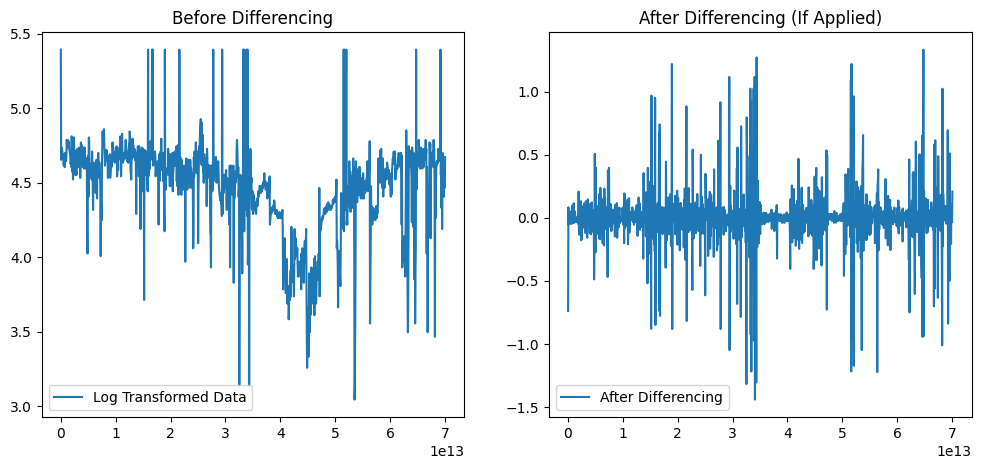

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(df_filtered['Lifetouch Heart Rate log'], label="Log Transformed Data")
plt.title("Before Differencing")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(df_filtered['Lifetouch Heart Rate log diff'].dropna(), label="After Differencing")
plt.title("After Differencing (If Applied)")
plt.legend()

plt.show()


 ## Train-Test Split

This cell splits the differenced, log-transformed heart rate data into training (80%) and testing (20%) sets for model building and evaluation.

In [ ]:
# Split the differenced log-transformed data into training (80%) and testing (20%) sets
train_size = int(len(df_filtered) * 0.8)  # Define the split size

train_data = df_filtered['Lifetouch Heart Rate log diff'].iloc[:train_size]  # First 80% for training
test_data  = df_filtered['Lifetouch Heart Rate log diff'].iloc[train_size:]  # Remaining 20% for testing

train_data = train_data.interpolate(method='linear')
test_data = test_data.interpolate(method='linear')

# Print the shapes of training and testing datasets
print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)


Train shape: (934,)
Test shape: (234,)


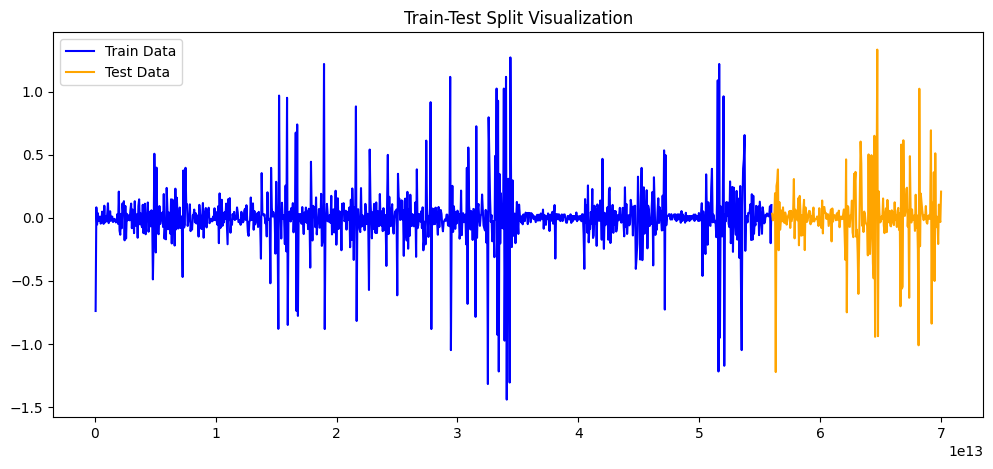

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(train_data, label="Train Data", color='blue')
plt.plot(test_data, label="Test Data", color='orange')
plt.title("Train-Test Split Visualization")
plt.legend()
plt.show()


##  Auto ARIMA for Optimal Parameter Selection

In [ ]:
train_data = train_data.dropna()

In [ ]:
# Automatically determine the best ARIMA(p, d, q) model for time series forecasting
arima_auto = pm.auto_arima(
    train_data,
    start_p=0, start_q=0,  # Start from minimal AR and MA values
    max_p=5, max_q=5,  # Search up to p=5, q=5
    seasonal=False,  # No seasonality since we're working with raw time series
    trace=True,  # Print model evaluation process
    error_action='ignore',  # Ignore non-converging models
    suppress_warnings=True  # Suppress unnecessary warnings
)

# Display the best-selected ARIMA model summary
print(arima_auto.summary())


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=40.323, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-207.042, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-328.303, Time=0.13 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-334.085, Time=0.18 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-351.942, Time=0.50 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-254.466, Time=0.21 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-350.939, Time=1.51 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-350.910, Time=2.83 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-348.001, Time=0.64 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-277.355, Time=0.36 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-348.414, Time=0.73 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-350.078, Time=1.26 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0]          
Total fit time: 8.490 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  933
Model:               SARIMAX(2, 0, 1)   Log Likelihood                 179.971
Date:                Fri, 28 Feb 2025   AIC                           -351.942
Time:                        14:45:34   BIC                           -332.588
Sample:                             0   HQIC                          -344.562
                                - 933                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1950      0.025      7.653      0.000       0.145 

##  ARIMA Diagnostics

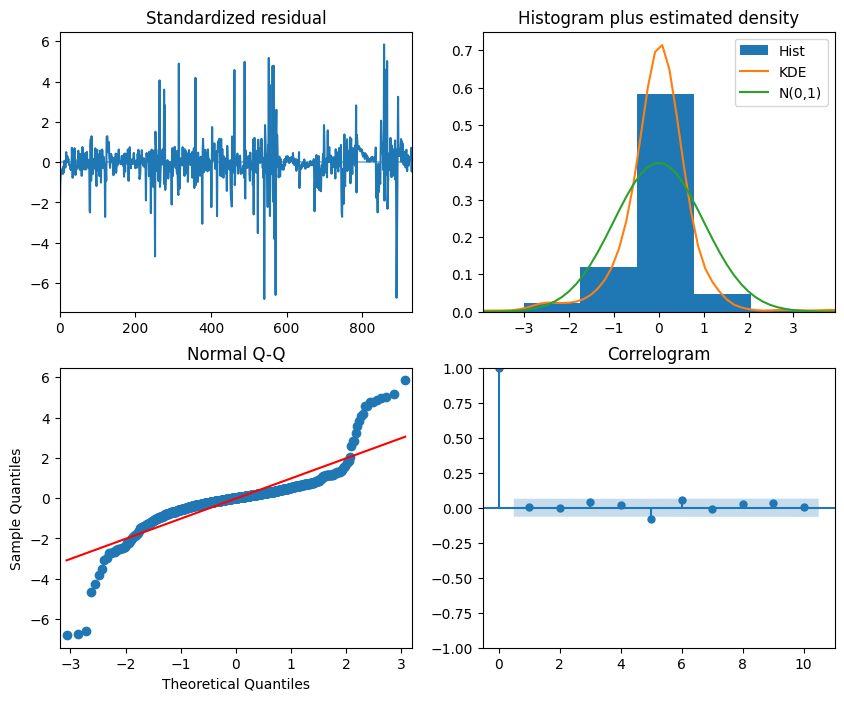

In [ ]:
# Generate diagnostic plots for the fitted ARIMA model
arima_auto.plot_diagnostics(figsize=(10, 8))
plt.show()  # Display the plots


##  Generating Predictions with ARIMA

In [ ]:
# Define the number of periods to forecast based on the test dataset length
n_periods = len(test_data)

# Generate forecasts and confidence intervals using the trained ARIMA model
forecast, confint = arima_auto.predict(n_periods=n_periods, return_conf_int=True)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


##  Structuring Forecast Results

This cell structures the forecasted values into a pandas Series, ensuring they have the same index as the test dataset.

In [ ]:
forecast_index = test_data.index  # use the same index as test_data
forecast_series = pd.Series(forecast.values, index=test_data.index)
lower_series = pd.Series(confint[:, 0], index=forecast_index)
upper_series = pd.Series(confint[:, 1], index=forecast_index)

## Visualizing Forecast vs Actual Data

This cell visualizes the actual vs predicted values, ensuring the forecast aligns well with the time series structure.

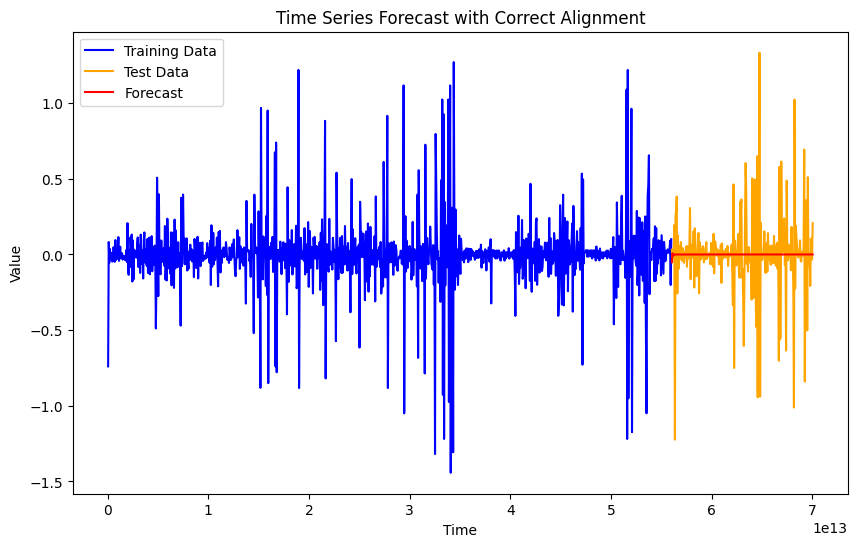

In [ ]:
plt.figure(figsize=(10, 6))  # Set figure size

# Plot the training data in blue
plt.plot(train_data.index, train_data, label='Training Data', color='blue')

# Plot the test data in orange
plt.plot(test_data.index, test_data, label='Test Data', color='orange')

# Plot the forecasted values in red
plt.plot(forecast_series.index, forecast_series, label='Forecast', color='red')

# Set labels and title
plt.title('Time Series Forecast with Correct Alignment')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()  # Add legend for clarity
plt.show()  # Display the plot


# Predicting the Next 20 Time Steps


This cell generates the next 20 time steps of forecasted heart rate values using the trained ARIMA model.

In [ ]:
# Define the number of future periods to predict
n_periods = 20

# Generate the next 20-minute forecast along with confidence intervals
forecast, confint = arima_auto.predict(n_periods=n_periods, return_conf_int=True)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


## Undoing Log Transformation & Formatting Output

This cell undoes the log transformation (antilog), assigns a 1-minute interval time index, and prepares the forecasted values for final output.

In [ ]:
# Convert forecast results into a DataFrame
forecast_df = forecast.reset_index()

# Rename columns for clarity
forecast_df.columns = ["Time Period", "Lifetouch Heart Rate log"]

# Apply antilog to convert log-transformed values back to the original scale
forecast_df["Lifetouch Heart Rate log"] = np.exp(forecast_df["Lifetouch Heart Rate log"])

# Assign a proper time index with 1-minute intervals
forecast_df.index = pd.timedelta_range(start="0 days", periods=len(forecast_df), freq="1min")
forecast_df.index.name = 'Time Frame'  # Rename index to 'Time Frame' for clarity

# Drop unnecessary columns
forecast_df.drop(columns=["Time Period"], inplace=True)


In [ ]:
forecast_df["Lifetouch Heart Rate"] = forecast_df["Lifetouch Heart Rate log"].cumsum() + df_filtered["Lifetouch Heart Rate"].iloc[-1]


In [ ]:
forecast_df.drop(columns=["Lifetouch Heart Rate log"], inplace=True)


In [ ]:
forecast_df.to_csv("forecast.csv")